# Zain Ali

## Research question/interests
- ** What are the differences in the trends of inflation in more Captilatist economies as compared to mixed economies?**
- Since the data set used consists for much more thhan 30 years, and consists data for numerous different countries, I wish to see what the difference in inflation trends has been between Capitalist and mixed economies, and if there is a significant difference in the two.
- **  Does a high or low CPI indicate whether a country is developing or developed**
- With data from numerous countries, I wish to analyse and understand the trend of CPI and its effect on a countries stance on development.

### Data Analysis Pipeline
1. Load Data
- Will be loading from a relative path as a csv
2. Clean Data
- Will be removing columns: 'Indicator' 'Measure' 'Frequency', as they are not needed for the analysis. Will be dropping 'FLAG CODES' as it consists of NaN values.
- Will be droppping rows after the 6075 entry as points after that have values different to the ones before it. (Time goes to monthly instead of yearly)
3. Process Data
- Will be making new datasets for the countries used for analysis and for the topics involved.
- Countries chosen will be CAN and TUR, with topics chosen to be FOOD and ENRG. Will combine subdatafram of each country chosen with chosen topic in order to produce the visualisations.
4. Wrangle Data
- I have removed rows from Time in order for the values to be consistent.
- I have not needed external data sources for the current visualistion.


In [ ]:
import pandas as pd
import numpy as nm
import seaborn as sns
import matplotlib.pylab as plt
import code10

In [ ]:
df = pd.read_csv('./../data/raw/Inflationdataset.csv')
df


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,CPI,ENRG,AGRWTH,A,1972,4.910070,NaN
1,AUS,CPI,ENRG,AGRWTH,A,1973,3.762801,NaN
2,AUS,CPI,ENRG,AGRWTH,A,1974,13.173540,NaN
3,AUS,CPI,ENRG,AGRWTH,A,1975,19.422470,NaN
4,AUS,CPI,ENRG,AGRWTH,A,1976,8.833195,NaN
...,...,...,...,...,...,...,...,...
293465,EU27_2020,CPI,TOT_FOODENRG,IDX2015,M,Aug-22,112.760000,NaN
293466,EU27_2020,CPI,TOT_FOODENRG,IDX2015,M,Sep-22,113.830000,NaN
293467,EU27_2020,CPI,TOT_FOODENRG,IDX2015,M,Oct-22,114.560000,NaN
293468,EU27_2020,CPI,TOT_FOODENRG,IDX2015,M,Nov-22,114.690000,NaN


In [ ]:
df.columns
# to understand the columns we have, alongside the values in the columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes'],
      dtype='object')

### Explanation of columns
- Location consists of the corresponding Location of each row.
- Indicator shows what the value of the row represents, however, since the indicator is CPI (Consumer Price Index) for all rows, we can remove this column
- Subject consists of either food, energy, and total, which shows whether the value in the row refers to the price of food, energy, or the total.
- Measure is a constant value which is not needed for this analysis. We can remove it.
- Frequency is a constant value which is not needed for this analysis. We can remove it.
- Time refers to the time of year or year the value of the row was recorded.
- Value consists of the value of CPI (consumer Price Index), which is what this analysis will be based on.
- Flag Codes consist of NaN values, which should be dropped.

In [ ]:
df.nunique(axis=0)
#helps to understand which columns will help most for comparisons

LOCATION          52
INDICATOR          1
SUBJECT            4
MEASURE            2
FREQUENCY          3
TIME            1745
Value         246286
Flag Codes         1
dtype: int64

- We can now tell that the Value column will be what what the analysis is based on

In [ ]:
#indicator, measure, and frequency look like they will not be needed for my current analysis
def clean1(df):
    df_cleaned = df.copy().drop(['INDICATOR','MEASURE','FREQUENCY', 'Flag Codes'], axis=1)
    return df_cleaned
df = clean1(df)
df

,LOCATION,SUBJECT,TIME,Value
0,AUS,ENRG,1972,4.910070
1,AUS,ENRG,1973,3.762801
2,AUS,ENRG,1974,13.173540
3,AUS,ENRG,1975,19.422470
4,AUS,ENRG,1976,8.833195
...,...,...,...,...
293465,EU27_2020,TOT_FOODENRG,Aug-22,112.760000
293466,EU27_2020,TOT_FOODENRG,Sep-22,113.830000
293467,EU27_2020,TOT_FOODENRG,Oct-22,114.560000
293468,EU27_2020,TOT_FOODENRG,Nov-22,114.690000


In [ ]:
#from the initial, I can see tha time is more spread out for the recent years, I wish to change that
#spread out time starts from the 6075 reading onwards, so we should remove that
def cleanTime(df):
    df_cleaned=df.copy().drop(df.index[6075:293470])
    return df_cleaned
df = cleanTime(df)
df

,LOCATION,SUBJECT,TIME,Value
0,AUS,ENRG,1972,4.910070
1,AUS,ENRG,1973,3.762801
2,AUS,ENRG,1974,13.173540
3,AUS,ENRG,1975,19.422470
4,AUS,ENRG,1976,8.833195
...,...,...,...,...
6070,OECD,TOT,2017,2.281483
6071,OECD,TOT,2018,2.607160
6072,OECD,TOT,2019,2.068702
6073,OECD,TOT,2020,1.370630


In [ ]:
#sub data frames for Canada and Turkey
def subFood(df):
    df_F = df.loc[df['SUBJECT']=="FOOD"].reset_index()
    return df_F
def subEnrg(df):
    df_energy = df.loc[df['SUBJECT'] == "ENRG"].reset_index()
    return df_energy
def subCanEnrg(df):
    df_CAN_E = (df.loc[df['LOCATION']=="CAN"].reset_index())
    return df_CAN_E
def subTurEnrg(df):
    df_TUR_E= (df.loc[df['LOCATION']=="TUR"].reset_index())
    return df_TUR_E
def subCanFood(df):
    df_CAN_F = (df.loc[df['LOCATION']=="CAN"].reset_index())
    return df_CAN_F
def subTurFood(df):
    df_TUR_F = (df.loc[df['LOCATION']=="TUR"].reset_index())
    return df_TUR_F
df_F=subFood(df)
df_energy=subEnrg(df)
df_CAN_E=subCanEnrg(df)
df_TUR_E=subTurEnrg(df)
df_CAN_F=subCanFood(df)
df_TUR_F=subTurFood(df)

<AxesSubplot:title={'center':'Canada CPI from 1961-2022'}, xlabel='Years', ylabel='CPI'>

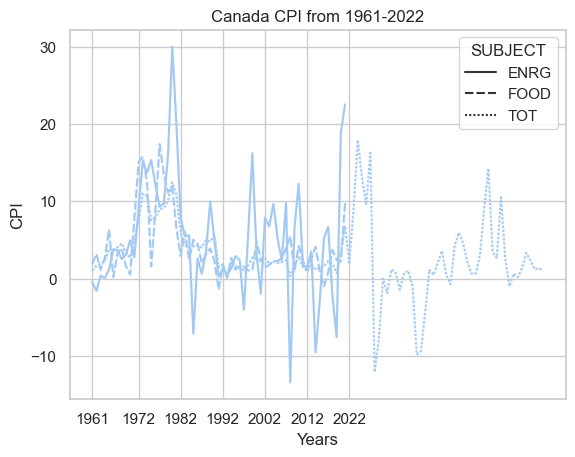

In [ ]:
df_CAN_PRICES= pd.concat([df_CAN_E, df_CAN_F], ignore_index=True)
canadaFoodEnergy=sns.lineplot(data = df_CAN_PRICES, x=df_CAN_PRICES['TIME'], y=df_CAN_PRICES['Value'], style = "SUBJECT") 
canadaFoodEnergy.set_xticklabels(canadaFoodEnergy.get_xticklabels(range(20)), rotation=0)
plt.xticks([0, 11, 21,31,41,51,61], ['1961','1972', '1982','1992','2002', '2012', '2022'])
canadaFoodEnergy.set(title='Canada CPI from 1961-2022', xlabel='Years', ylabel='CPI')
canadaFoodEnergy

- All three subjects for the long run observe relatively similar trends of CPI over the years.
- Energy prices are the most unstable while Total CPI is the most stable
- With this, over the long run all subjects have similar trends, with varying magnitudes. 
- Total CPI would be the best subject to conduct our analysis on.

<AxesSubplot:title={'center':'Turkey CPI'}, xlabel='Years', ylabel='CPI'>

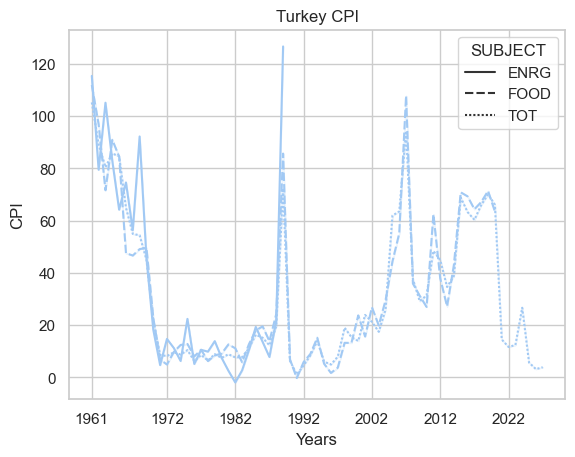

In [ ]:
df_TUR_PRICES= pd.concat([df_TUR_E, df_TUR_F], ignore_index=True)
TurGenPlt=sns.lineplot(data = df_TUR_PRICES, x=df_TUR_PRICES['TIME'], y=df_TUR_PRICES['Value'], style = "SUBJECT")
TurGenPlt.set_xticklabels(TurGenPlt.get_xticklabels(range(20)), rotation=0)
plt.xticks([0, 11, 21,31,41,51,61], ['1961','1972', '1982','1992','2002', '2012', '2022'])
TurGenPlt.set(title='Turkey CPI', xlabel='Years', ylabel='CPI')
TurGenPlt

- We observe the same thing as observed above. All three subjects of CPI have similar trends in the long run.
- Once again Energy prices are the most unstable, while total CPI is the most stable.
- Total CPI would be the best subject to conduct our analysis.

Using the similarities from the two graphs above, we can say that for our analysis we should use Total CPI as our subject with analysis.

In [ ]:
df = (df.loc[df['SUBJECT']=="TOT"].reset_index())
df

,index,LOCATION,SUBJECT,TIME,Value
0,116,AUS,TOT,1950,8.695652
1,117,AUS,TOT,1951,19.428570
2,118,AUS,TOT,1952,17.224880
3,119,AUS,TOT,1953,4.489796
4,120,AUS,TOT,1954,1.562500
...,...,...,...,...,...
2408,6070,OECD,TOT,2017,2.281483
2409,6071,OECD,TOT,2018,2.607160
2410,6072,OECD,TOT,2019,2.068702
2411,6073,OECD,TOT,2020,1.370630


[Text(0.5, 1.0, 'Turkey compared to Canada'),
 Text(0.5, 0, 'Years 1961 - 2022'),
 Text(0, 0.5, 'CPI')]

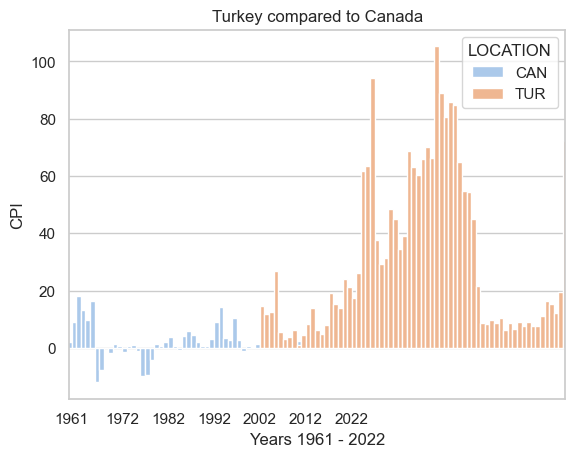

In [ ]:

dfTUR_CAN= pd.concat([(df.loc[df['LOCATION']=="CAN"].reset_index()), (df.loc[df['LOCATION']=="TUR"].reset_index())], ignore_index=True)
TurCanPlt=sns.barplot(data = dfTUR_CAN, x=dfTUR_CAN['TIME'], y=dfTUR_CAN['Value'],width=2, hue = "LOCATION")
TurCanPlt.set_xticklabels(TurCanPlt.get_xticklabels(range(20)), rotation=0)
sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
plt.xticks([0, 11, 21,31,41,51,61], ['1961','1972', '1982','1992','2002', '2012', '2022'])
TurCanPlt.set(title='Turkey compared to Canada', xlabel='Years 1961 - 2022', ylabel='CPI')

- We can use the graph and tell from 2002, when both have recorded values, till 2019, both countries observe similar trends of CPI changes, however the covid pandemic ended up effecting Turkiye much more than Canada.
- Since the effects of the pandemic are an exemption to standard economic policy effects, we can say that both countries observe similar trends of CPI changes, only with Turkiye always having a higher CPI level.

[Text(0.5, 1.0, 'Trends of Inflation between multiple countries'),
 Text(0.5, 0, 'CPI'),
 Text(0, 0.5, 'Countries')]

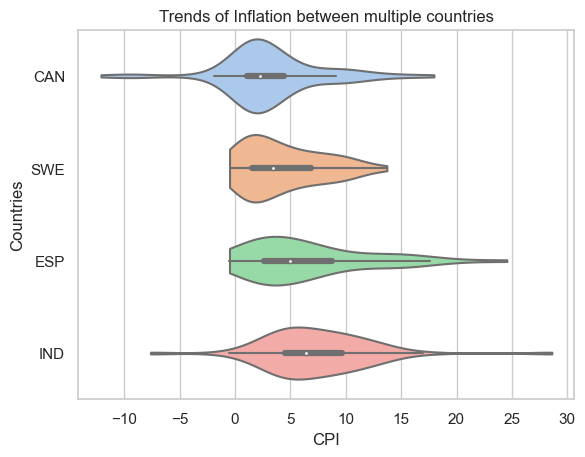

In [ ]:
Gen1=pd.concat([df.loc[df['LOCATION']=="CAN"].reset_index(), (df.loc[df['LOCATION']=="SWE"].reset_index()),(df.loc[df['LOCATION']=="ESP"].reset_index()),(df.loc[df['LOCATION']=="IND"].reset_index())], ignore_index=True)
Gen_Plt=sns.violinplot(data =Gen1 , x=Gen1['Value'], y=Gen1['LOCATION'], cut=0)
sns.set_theme(style="whitegrid", palette="pastel")
Gen_Plt.set(title='Trends of Inflation between multiple countries', xlabel='CPI', ylabel='Countries')

- All plots in the violing graph show us that average CPI level for all of these countries, Is not too far off. 
- All plots show a similar shape, showing that inflation trends are relatively similar for each of these plots.
- The 2 developing countries observe the highest CPI levels, higher than the 2 developed countries by a significant countries.

With the graphs above I am able to identify that there is a positive correlation between prices of energy and prices of food for both Canada and Turkiye, however, both countries have a varying correlation with each other of their changes in price levels for food and energy. The third graph shows that the trend between the two countris positive for 2 thirds of the graph, with a negative corellation in between.

Text(0.5, 0.98, 'CPI across different countries over the years')

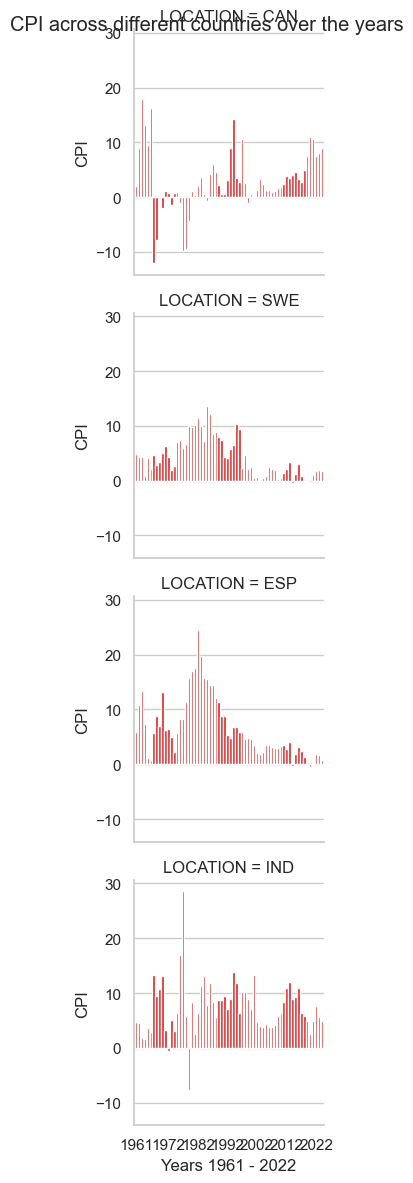

In [ ]:
G = sns.FacetGrid(Gen1, col = 'LOCATION')
G.map_dataframe(sns.barplot,data=Gen1, x="TIME", y="Value", color = 'red')
plt.xticks([0, 11, 21,31,41,51,61], ['1961','1972', '1982','1992','2002', '2012', '2022'])
G.set( xlabel='Years 1961 - 2022', ylabel='CPI')
G.fig.suptitle("CPI across different countries over the years")

## Revised questions:
- ** What are the differences in energy prices for developing and developed countries? Is there a correlation between the two?
- This data focuses quite a bit on energy levels. I wouls like to us that and identify trends between different countries and their energy levels, and see how strong the correllation/s are, if there are any.
- ** Do developing countries always have higher energy costs? Does a developed country benefit in price level if they provide other ocuntries with energy?
- The first part of this question is achieveable through this data set, as there are enough data sets to compare countries and their price levels and find a consistency. The second question would require a few articles which indicate deals made between countries for energy, however, I feel it will be vital to achieving a conclusion.
## Analysis Plan:
After making the few plots I have, I have realised that the values when plotted are too unstable when achieving a long run trend. So I must cut down on the number of years of data used, or focus on periodic trends, in order to answer my questions.